<h2>Problem Statement:</h2>

Through the analysis and modeling of the Aimes, Iowa dataset of 2006 - 2010 home sales, can a best mix of features be constructed to predict the sale price of homes in a given market? 

<h1>Exploratory Data Analysis & Cleaning<h1>

<h2>Import Packages<h2>

In [1]:
#basic DS packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#for all models
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, PowerTransformer
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

#for regression models
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV


#for Jupyter notebook:
%matplotlib inline

<h2>Import Data into DataFrame<h2>

In [2]:
df = pd.read_csv('./datasets/train.csv')
outside_df = pd.read_csv('./datasets/test.csv')

In [3]:
#Remove the max column setting in pandas

pd.options.display.max_columns = None
pd.options.display.max_rows = None

<h2>Explore the Data</h2>

<h4>How many rows and columns are we dealing with?</h4>

In [4]:
#2051 rows and 81 columns of data

df.shape

(2051, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

<h2>Dealing with NaN's</h2>

<h3>Consult the Data Dictionary

<h4>Determine NaN's for Categorical Data and Replace/Drop</h4>

In [6]:
#Calculate null quantities for all categorical columns, and replace NaN with none.
#I have manually checked the data dictionary to confirm that this is an adequate solution.

null_cat_columns = []  #Saves list of the NaN category columns that have been filled with 'None'. Only for reference.  

for i in df:
    if (df[i].isnull().sum() > 0) & (df[i].dtype == 'O'):
        null_cat_columns.append(i)
        df[i].fillna('None', inplace = True)


In [7]:
#Above for outside dataframe

for i in outside_df:
    if (outside_df[i].isnull().sum() > 0) & (outside_df[i].dtype == 'O'):
        null_cat_columns.append(i)
        outside_df[i].fillna('None', inplace = True)

<h4>Determine NaN's for Non-Categorical Data and Replace/Drop</h4>

In [8]:
#List null quantities for non-categorical quantities.
#These lists are useful because there are SO many columns, that many get cut off when checking manually with .isnull()

for i in df:
    if (df[i].isnull().sum() > 0):
        print(f'{i}: \nTotal: {df[i].isnull().sum()}\nPct: {df[i].isnull().mean()}\n')

Lot Frontage: 
Total: 330
Pct: 0.16089712335446124

Mas Vnr Area: 
Total: 22
Pct: 0.010726474890297415

BsmtFin SF 1: 
Total: 1
Pct: 0.00048756704046806434

BsmtFin SF 2: 
Total: 1
Pct: 0.00048756704046806434

Bsmt Unf SF: 
Total: 1
Pct: 0.00048756704046806434

Total Bsmt SF: 
Total: 1
Pct: 0.00048756704046806434

Bsmt Full Bath: 
Total: 2
Pct: 0.0009751340809361287

Bsmt Half Bath: 
Total: 2
Pct: 0.0009751340809361287

Garage Yr Blt: 
Total: 114
Pct: 0.05558264261335934

Garage Cars: 
Total: 1
Pct: 0.00048756704046806434

Garage Area: 
Total: 1
Pct: 0.00048756704046806434



In [9]:
df['Lot Frontage'].describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

In [10]:
#Replace NaN's with 0 for Masonry Veneer Type, Basement Half Bath, and Basement Full Bath

df['Lot Frontage'].fillna(69, inplace = True) # 69 is the mean of the category  
df['Mas Vnr Area'].fillna(0, inplace = True)
df['Bsmt Half Bath'].fillna(0, inplace = True)
df['Bsmt Full Bath'].fillna(0, inplace = True)


outside_df['Lot Frontage'].fillna(69, inplace = True) # 69 is the mean of the category 
outside_df['Mas Vnr Area'].fillna(0, inplace = True)
outside_df['Bsmt Half Bath'].fillna(0, inplace = True)
outside_df['Bsmt Full Bath'].fillna(0, inplace = True)

In [11]:
outside_df['Lot Frontage'].describe()

count    879.000000
mean      69.515358
std       21.365928
min       21.000000
25%       60.000000
50%       69.000000
75%       78.500000
max      182.000000
Name: Lot Frontage, dtype: float64

<h4>Drop Unecessary Columns with too many NaN's to Manually Resolve</h4>

In [12]:
#Columns to drop

drop_columns = ['Garage Yr Blt']

In [13]:
df.drop(drop_columns, axis = 1, inplace = True)
outside_df.drop(drop_columns, axis = 1, inplace = True)

In [14]:
outside_df.isnull().sum().sum()

0

<h4>Manually isolate and replace remmaining NaN's</h4>

In [15]:
#Only row with NaN in specific basement columns

df.iloc[1327] = df.iloc[1327].fillna(0)

In [16]:
#Only row with NaN in specific garage columns

df.iloc[1712] = df.iloc[1712].fillna(0)

In [17]:
df.isnull().sum().sum()

0

<h2>Data Type Adjustment</h2>

<u><b>Note:</b></u>  Any categorical changes should be processed on both datasets simultaneously

### Ordinal Variables

In [18]:
list_of_ordinals = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Kitchen Qual',
                   'Garage Qual', 'Garage Cond', 'Pool QC']


#inside DataFrame

for i in df[list_of_ordinals]:
    df[i] = df[i].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'None' : 0})
    
#Outside DataFrame
for i in outside_df[list_of_ordinals]:
    outside_df[i] = outside_df[i].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'None' : 0})

In [19]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,69.0,13517,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,Typ,0,None,Attchd,RFn,2.0,475.0,3,3,Y,0,44,0,0,0,0,0,None,None,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,Typ,1,TA,Attchd,RFn,2.0,559.0,3,3,Y,0,74,0,0,0,0,0,None,None,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,Typ,0,None,Detchd,Unf,1.0,246.0,3,3,Y,0,52,0,0,0,0,0,None,None,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,Typ,0,None,BuiltIn,Fin,2.0,400.0,3,3,Y,100,0,0,0,0,0,0,None,None,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,Typ,0,None,Detchd,Unf,2.0,484.0,3,3,N,0,59,0,0,0,0,0,None,None,0,3,2010,WD,138500


<h4>Categorize Month & Year Sold (and Dummy)</h4>

In [20]:
#Create dummy df's for month and year, to be concatenated with the full df, but also available for later analysis.

#For inside dataframe

mo_sold_dummy = pd.get_dummies(df['Mo Sold'])
yr_sold_dummy = pd.get_dummies(df['Yr Sold'])
mo_and_year_dummy = pd.concat([mo_sold_dummy, yr_sold_dummy], axis = 1)

neighborhood_dummy = pd.get_dummies(df['Neighborhood'])

# #For outside dataframe

mo_sold_dummy_out = pd.get_dummies(outside_df['Mo Sold'])
yr_sold_dummy_out = pd.get_dummies(outside_df['Yr Sold'])
mo_and_year_outside_dummy = pd.concat([mo_sold_dummy_out, yr_sold_dummy_out], axis = 1)

neighborhood_out_dummy = pd.get_dummies(outside_df['Neighborhood'])

In [21]:
neighborhood_dummy.columns

Index(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'Greens', 'GrnHill', 'IDOTRR',
       'Landmrk', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes',
       'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW',
       'Somerst', 'StoneBr', 'Timber', 'Veenker'],
      dtype='object')

<h4>Create Polynomial Calendar Features</h4>

In [22]:
#instantiate a Polynomial Features variable.

poly = PolynomialFeatures(include_bias = False)

In [23]:
#Create a polynomial feature database of month and year combinations.  Irrational ones (i.e. Feb * Mar) to be dropped a few rows down.

#inside dataframe

mo_yr_poly = poly.fit_transform(mo_and_year_dummy)
mo_yr_poly_df = pd.DataFrame(mo_yr_poly, columns = poly.get_feature_names(mo_and_year_dummy.columns.astype(str)))


# #outside dataframe

mo_yr_poly_out = poly.fit_transform(mo_and_year_outside_dummy)
mo_yr_poly_outside_df = pd.DataFrame(mo_yr_poly_out, columns = poly.get_feature_names(mo_and_year_outside_dummy.columns.astype(str)))







In [24]:
mo_yr_poly_df.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '2007^2', '2007 2008', '2007 2009', '2007 2010', '2008^2', '2008 2009',
       '2008 2010', '2009^2', '2009 2010', '2010^2'],
      dtype='object', length=170)

### Test y against log(y)

In [54]:
#df['e'] = np.log(df['Overall_Liv_Area'])

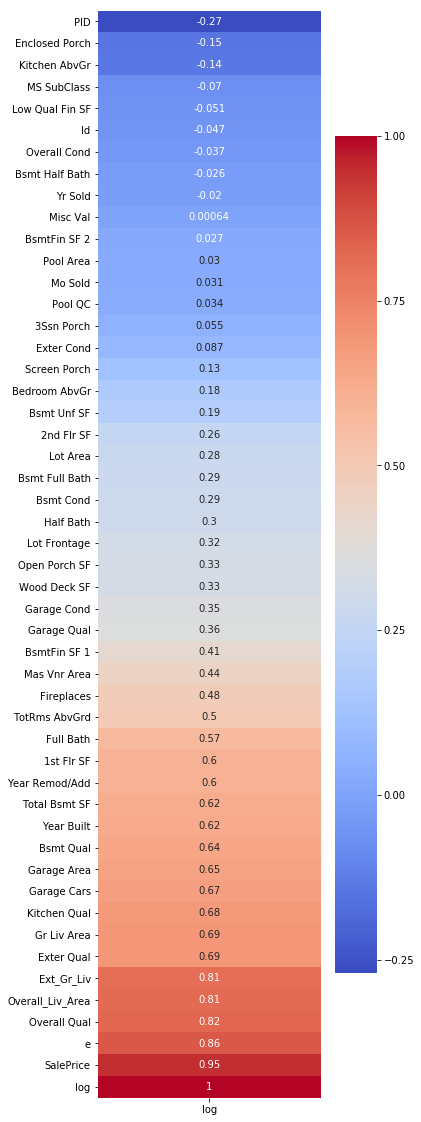

In [55]:
# plt.figure(figsize = (5,20))

# sns.heatmap(df.corr()[['log']].sort_values('log'), annot = True, cmap = 'coolwarm')

In [ ]:
#Manually Created Polynomial Features influenced by above correlations.

df['Qual2'] = df['Overall Qual']**2
df['BasmtSF_Qual'] = df['Total Bsmt SF'] * df['Overall Qual']
df['YearBuilt_Qual'] = df['Year Built'] * df['Overall Qual']
df['GarageArea_Qual'] = df['Garage Area'] * df['Overall Qual']
df['LivArea_Qual'] = df['Gr Liv Area'] * df['Overall Qual']
df['LivArea_GarageArea_Qual'] = df['LivArea_Qual'] * df['Garage Area']



# #Apply the above manual features to the outside data set.

outside_df['Qual2'] = outside_df['Overall Qual']**2
outside_df['BasmtSF_Qual'] = outside_df['Total Bsmt SF'] * outside_df['Overall Qual']
outside_df['YearBuilt_Qual'] = outside_df['Year Built'] * outside_df['Overall Qual']
outside_df['GarageArea_Qual'] = outside_df['Garage Area'] * outside_df['Overall Qual']
outside_df['LivArea_Qual'] = outside_df['Gr Liv Area'] * outside_df['Overall Qual']
outside_df['LivArea_GarageArea_Qual'] = outside_df['LivArea_Qual'] * outside_df['Garage Area']


In [ ]:
sns.heatmap(df.corr()[['SalePrice']].sort_values('SalePrice'), annot = True, cmap = 'coolwarm')

### Make Neighborhood Dummies and Weight them

In [ ]:
#inside neighbs
neighborhood_dummy = pd.get_dummies(df['Neighborhood'])

#outside neighbs
outside_neighborhood_dummy = pd.get_dummies(outside_df['Neighborhood'])

In [ ]:
#inside neighbs

for hood in neighborhood_dummy.columns:
    neighborhood_dummy[hood] = neighborhood_dummy[hood] * log(df['LivArea_Qual'])

In [ ]:
#outside neighbs

for hood in outside_neighborhood_dummy.columns:
    outside_neighborhood_dummy[hood] = outside_neighborhood_dummy[hood] * log(outside_df['LivArea_Qual'])

In [ ]:
#inside month/year combo

for col in mo_yr_poly_df.columns:
    mo_yr_poly_df[col] = mo_yr_poly_df[col] 

In [ ]:
#outside month/year combo

for col in mo_yr_poly_outside_df.columns:
    mo_yr_poly_outside_df[col] =  mo_yr_poly_outside_df[col] 

In [ ]:
# Manually created list of categorical variables to be dummied.  

list_to_dummy = ['Sale Type','MS SubClass', 'MS Zoning', 'Street', 'Alley','Lot Shape', 'Land Contour',
                 'Utilities', 'Lot Config', 'Land Slope','Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 
                 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
                 'Foundation','Bsmt Exposure','BsmtFin Type 1',
                 'BsmtFin Type 2','Heating','Heating QC','Central Air','Electrical','Functional',
                 'Fireplace Qu','Garage Type','Garage Finish','Paved Drive',
                 'Fence','Misc Feature']

# list_of_ordinals = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Kitchen Qual',
#                    'Garage Qual', 'Garage Cond', 'Pool QC']

In [ ]:
df.shape

In [ ]:
df.head(1)

In [ ]:
outside_df.shape

In [ ]:
#Create and add dummy columns from the above dummy list to 'df'

dummies = pd.get_dummies(df[list_to_dummy])

In [ ]:
dummies.shape

In [ ]:
#Create and add dummy columns from the above dummy list to 'outside_df'

outside_dummies = pd.get_dummies(outside_df[list_to_dummy])

In [ ]:
outside_dummies.shape

In [ ]:
#Create dummies with values weighted by 'Overall Qual'


for d in dummies.columns:
    dummies[d] = dummies[d] * df['LivArea_Qual']

for d in outside_dummies.columns:
    outside_dummies[d] = outside_dummies[d] * outside_df['LivArea_Qual']

In [ ]:
#Merge dataframe ('df') with calendar dataframes

df = pd.concat([df, mo_yr_poly_df], axis = 1)
outside_df = pd.concat([outside_df, mo_yr_poly_outside_df], axis = 1)

In [ ]:
#Merge dataframes with Neighborhoods


df = pd.concat([df, neighborhood_dummy], axis = 1)
outside_df = pd.concat([outside_df, outside_neighborhood_dummy], axis = 1)

In [ ]:
#Merge remaining Dummies

df = pd.concat([df, dummies], axis = 1)
outside_df = pd.concat([outside_df, outside_dummies], axis = 1)

#### Drop Outliers

In [ ]:
#Low Sale Price, HIGH Lot Size

(df.drop([1628,183], inplace = True))

In [ ]:
#Additional Manually Created Polynomial Features influenced by above correlations.

# df['TA_cond'] = df['Exter Qual_TA'] * df['Overall Cond']
# df['TA_combo'] = df['Exter Qual_TA'] * df['Kitchen Qual_TA']
# df['TA_KitchBsmt'] = df['Kitchen Qual_TA'] * df['Bsmt Qual_TA']
# df['QualCond_LivArea'] = df['LivArea_Qual'] * df['Overall Cond']
# df['LivArea_Cond'] = df['Gr Liv Area'] * df['Overall Cond']
# df['YearBuilt_Qual'] = df['Overall Qual'] * df['Year Built']
# df['YearRemod_Qual'] = df['Overall Qual'] * df['Year Remod/Add']

# outside_df['TA_cond'] = outside_df['Exter Qual_TA'] * outside_df['Overall Cond']
# outside_df['TA_combo'] = outside_df['Exter Qual_TA'] * outside_df['Kitchen Qual_TA']
# outside_df['TA_KitchBsmt'] = outside_df['Kitchen Qual_TA'] * outside_df['Bsmt Qual_TA']
# outside_df['QualCond_LivArea'] = outside_df['LivArea_Qual'] * outside_df['Overall Cond']
# outside_df['LivArea_Cond'] = outside_df['Gr Liv Area'] * outside_df['Overall Cond']
# outside_df['YearBuilt_Qual'] = outside_df['Overall Qual'] * outside_df['Year Built']
# outside_df['YearRemod_Qual'] = outside_df['Overall Qual'] * outside_df['Year Remod/Add']

In [ ]:
#print df and outside df features

print(df.shape)
print(outside_df.shape)

In [ ]:
df.isnull().sum().sum()

<h3>Declare target column</h3>

In [ ]:
#Pull out 'SalePrice' before trimming dummy columns from dataframes
y = df['SalePrice']

<h3>Drop Columns with Zero Data in Either Dataframe</h3>

In [ ]:
#Drop all dummy columns in df that doesn't have any values.  No value add if there is no data in the training df.

# for col in df.columns:
#     if ((df[col].min() == False) & (df[col].max() == False)):
#         df.drop(col, axis = 1, inplace = True)

In [ ]:
df.shape

In [ ]:
#Drop columns that are only in the main 'df'

for col in outside_df:
    if col not in df:
        outside_df.drop([col], axis = 1, inplace = True)

In [ ]:
#Drop columns only in the 'outside' dataframe.

for col in df:
    if col not in outside_df:
        df.drop([col], axis = 1, inplace = True)

In [ ]:
#Confirm shape of df
df.shape

In [ ]:
df.dtypes

In [ ]:
df.head()

In [ ]:
#COnfirm the shape of outside df

outside_df.shape

<h2>Feature Selection</h2>

In [ ]:
#Prepare the data to model

features = [col for col in df._get_numeric_data().columns]  #Thank Riley for this gem
X = df[features].drop(columns = ['Id', 'PID'])  #matrix
y = y  #vector


In [ ]:
#Prepare the outside data set

outside_features = [col for col in outside_df._get_numeric_data().columns]
outside_X = outside_df[outside_features].drop(columns = ['Id', 'PID'])  #matrix

In [ ]:
X.shape

In [ ]:
outside_X.shape

In [ ]:
# X.drop('LivArea_GarageArea_Qual', axis = 1, inplace = True)
# outside_X.drop('LivArea_GarageArea_Qual', axis = 1, inplace = True)

<h3>Below 2 Cells for Intermediate Correlation Visualization ONLY</h4>

In [ ]:
#Re-Explore correlations with 'SalePrice' before setting up model

# X['SalePrice'] = y

# plt.figure(figsize = (5,90))



# sns.heatmap(X.corr()[['SalePrice']].sort_values('SalePrice'), annot = True, cmap = 'coolwarm')


# X.drop('SalePrice', axis = 1, inplace = True)

<h2>Instantiate and Build Model</h2>

In [ ]:
#Instantiate the model on the Linear Regression class 

model = LinearRegression()

In [ ]:
model.fit(X,y)

In [ ]:
# After fitting our model, we can generate predictions.
y_pred = model.predict(X)

In [ ]:
#The default score on regression model in sklearn is R^2.  Below is the R^2 of the model

model.score(X, y)

In [ ]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
rmse

In [ ]:
#The model's coefficients

coef = model.coef_
yint = model.intercept_

In [ ]:
#Calculate the residuals and find their mean

residuals = y - y_pred
residuals.mean()

plt.scatter(x = y_pred, y = residuals)
plt.axhline(0, color='r')


In [ ]:
df['residuals'] = residuals

In [ ]:
df.sort_values('residuals', ascending = True).head(20)

In [ ]:
#Low Outlier Residuals

X.drop([348], inplace = True)
y.drop([348], inplace = True)


#High Outlier Residuals

X.drop([1796, 1671, 151, 1136, 52, 841], inplace = True)
y.drop([1796, 1671, 151, 1136, 52, 841], inplace = True)


## Model Prep: Train/test split

Below is code for a Train / Test Split.  Since there is an outside dataset to test the model with, The 'train_test_split' function will be used only to compare results with using the full inside dataset to train the model, with splitting it internally as well as externally.  After optimization, training the model with the FULL original dataframe has yielded better results.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=35235)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

## Model Prep: `PowerTransformer`

In the cell below, fit a `PowerTransformer` to `X_train` and use it to transform both `X_train` and `X_test`.

In [ ]:
pt = PowerTransformer()
pt.fit(X_train)
X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)
outside_X_pt = pt.transform(outside_X)

We also want to transform our target to resemble a normal distribution, so we'll create another `PowerTrasformer` for our `y`.

In [ ]:
pt_y = PowerTransformer()
# PowerTransformer requires a matrix/DataFrame, which is why we're using the .to_frame() method on y_train
pt_y.fit(y_train.to_frame()) 
y_train_pt = pt_y.transform(y.to_frame())
y_test_pt = pt_y.transform(y_test.to_frame())

<h3>STANDARD SCALAR TO TRANSFORM DATA INTO Z-SCORES</h3>

In [ ]:
ss = StandardScaler()
ss.fit(X)  #Learning the mean and standard deviation for each column.  IMPORTANT
X_scaled = ss.transform(X)

In [ ]:
X.shape


In [ ]:
X_scaled_test = ss.transform(X_test)

In [ ]:
X_scaled_test.shape

In [ ]:
outside_X_scaled = ss.transform(outside_X)

In [ ]:
outside_X_scaled.shape

## Model Prep: Instantiate our models

We'll be evaluating `LinearRegression`, `LassoCV` and `RidgeCV`, so we'll need to create instances of all three models.

In [ ]:
lr = LinearRegression()

In [ ]:
lasso = LassoCV(n_alphas=200, cv=5)

In [ ]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [ ]:
elastic_net = ElasticNetCV(alphas=np.linspace(0.5, 1.0, 100), l1_ratio=0.5, cv=5)

## Cross validation

Using `cross_val_score` to evaluate all three models.

In [ ]:
X_train.shape

In [ ]:
lr_scores = cross_val_score(lr, X, y, cv=5)
lr_scores.mean()

In [ ]:
lasso_scores = cross_val_score(lasso, X_scaled, y, cv=5)
lasso_scores.mean()

In [ ]:
ridge_scores = cross_val_score(ridge, X_scaled, y, cv=7)
ridge_scores.mean()

In [ ]:
elastic_net_scores = cross_val_score(elastic_net, X_scaled, y, cv=7)
elastic_net_scores.mean()

## Model Fitting and Evaluation

<h3>Using Ridge Regression with Cross Validation</h3>

In [ ]:
ridge.fit(X_scaled, y)

In [ ]:
ridge.score(X_scaled, y)

In [ ]:
ridge.score(X_scaled_test, y_test)

In [ ]:
ridge_scores.mean()

In [ ]:
ridge_pred = ridge.predict(X_scaled)
rmse = np.sqrt(mean_squared_error(y, ridge_pred))
rmse

<h3> Using Lasso Regression with Cross Validation</h3>

In [ ]:
lasso.fit(X_scaled, y)

In [ ]:
lasso.score(X_scaled, y)

In [ ]:
lasso.score(X_scaled_test, y_test)

In [ ]:
lasso_scores.mean()

In [ ]:
lasso_pred = lasso.predict(X_scaled)

In [ ]:
rmse = np.sqrt(mean_squared_error(y, lasso_pred))
rmse

<h4>Find Coefficients for the Lasso Regression, then Re-Optimize</h4>

In [ ]:
coef = lasso.coef_
yint = lasso.intercept_

In [ ]:
coef.shape

In [ ]:
yint

In [ ]:
lasso_df = pd.DataFrame()

In [ ]:
lasso_df['Features'] = X.columns

In [ ]:
lasso_df['coefs'] = coef

In [ ]:
lasso_df.sort_values('coefs')

In [ ]:
len(lasso_df[lasso_df['coefs'] == False])

In [ ]:
#View the correlations of the lasso coefficients as a heatmap.

plt.figure(figsize = (50,50))
sns.heatmap(lasso_df)

In [ ]:
#Create a mask dataframe of zeroed out features and their coefficients

zero_coef_mask = lasso_df[lasso_df['coefs'] == False]

In [ ]:
#Turn these features into a list

zeroed_lasso_coefs = zero_coef_mask['Features'].tolist()

In [ ]:
print(zeroed_lasso_coefs)

In [ ]:
#Drop the zeroed out coefficients and re-fit the model.  THIS DIDN'T HELP PREDICTIONS.

# X.drop(columns = zeroed_lasso_coefs, inplace = True)
# outside_X.drop(columns = zeroed_lasso_coefs, inplace = True)

<h3>Using Elastic Net with Cross Validation</h3>

In [ ]:
elastic_net = elastic_net.fit(X_scaled, y)

In [ ]:
elastic_net_pred = elastic_net.predict(X_scaled)

In [ ]:
r2_score(y, ridge_pred)

<h3> Using Linear Regression Model on X </h3>

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_scaled, y)

In [ ]:
# After fitting our model, we can generate predictions.
y_pred = model.predict(X_scaled)

In [ ]:
#The default score on regression model in sklearn is R^2.  Below is the R^2 of the model

model.score(X_scaled, y)

In [ ]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
rmse

<h3>Reverse 'y' predictions when PowerTransformer is used</h3>

In [ ]:
# The .reshape(-1,1) method changes a numpy array into a numpy matrix with 1 column
pred_reversed = y.inverse_transform(pred.reshape(-1,1))

In [ ]:
pred_reversed

In [ ]:
r2_score(y_test, pred)

<h3> Using Linear Regression for Competition </h3>

In [ ]:

outside_X = outside_X   #matrix

outside_y_pred = model.predict(outside_X_scaled)

fortest_df = pd.DataFrame()
fortest_df['Id'] = outside_df['Id']
fortest_df['SalePrice'] = outside_y_pred


In [ ]:
outside_y_pred

<h3> Using Lasso for Competition </h3>

In [ ]:

outside_X = outside_X   #matrix

outside_y_pred = lasso.predict(outside_X_scaled)

fortest_df = pd.DataFrame()
fortest_df['Id'] = outside_df['Id']
fortest_df['SalePrice'] = outside_y_pred

In [ ]:
fortest_df['SalePrice'].head()

<h3>Using Ridge for Competition</h3>

In [ ]:
outside_X = outside_X #matrix

outside_y_pred = ridge.predict(outside_X_scaled)

fortest_df = pd.DataFrame()
fortest_df['Id'] = outside_df['Id']
fortest_df['SalePrice'] = outside_y_pred

In [ ]:
fortest_df.head()

<h2>Save to CSV</h2>

In [ ]:
#Save results for Kaggle Challenge
fortest_df.to_csv('./aimes_kaggle_622_lr', index = False)

In [ ]:
#Save results for Kaggle Challenge
fortest_df.to_csv('./aimes_kaggle_622_lr_scaled', index = False)

In [ ]:
#Save results for Kaggle Challenge -- Ridge
fortest_df.to_csv('./aimes_kaggle_622_ridge', index = False)

In [ ]:
#Save results for Kaggle Challenge
fortest_df.to_csv('./aimes_kaggle_622_lasso', index = False)

In [ ]:
#Save results for Kaggle Challenge -- without calendar polynomial features
fortest_df.to_csv('./aimes_kaggle_622_lasso_no_calendar', index = False)

In [ ]:
#Save results for Kaggle Challenge -- NULL Values = 21
fortest_df.to_csv('./aimes_kaggle_622_lasso_null_21', index = False)

In [ ]:
#Save results for Kaggle Challenge -- w/o inside T/TSplit
fortest_df.to_csv('./aimes_kaggle_622_lasso_no_ttsplit', index = False)

In [ ]:
#Save results for Kaggle Challenge -- w/ additional polynomial features
fortest_df.to_csv('./aimes_kaggle_622_lasso_added_features', index = False)

In [ ]:
#Save results for Kaggle Challenge -- Lot Frontage Mean
fortest_df.to_csv('./aimes_kaggle_622_lasso_lot_frontage_mean', index = False)

In [ ]:
#Save results for Kaggle Challenge -- Ridge with above adjustments
fortest_df.to_csv('./aimes_kaggle_622_ridge2', index = False)

In [ ]:
#Save results for Kaggle Challenge -- Ridge with above adjustments
fortest_df.to_csv('./aimes_kaggle_622_lasso -- refit after coef removal', index = False)

In [ ]:
#Save results for Kaggle Challenge -- Ridge with above adjustments
fortest_df.to_csv('./aimes_kaggle_622_lasso -- refit with Ridge after coef removal', index = False)

In [ ]:
#Save results for Kaggle Challenge -- And finally, with all of that, back to LR
fortest_df.to_csv('./aimes_kaggle_622_lr_scaled_plus_all', index = False)

In [ ]:
#Save results for Kaggle Challenge -- Weighted Quality Neighborhoods
fortest_df.to_csv('./aimes_kaggle_624_lr_neighborhoods', index = False)

In [ ]:
#Save results for Kaggle Challenge -- Weighted Dummys
fortest_df.to_csv('./aimes_kaggle_625_lasso_weighted', index = False)

In [ ]:
#Save results for Kaggle Challenge -- Weighted Dummys 2
fortest_df.to_csv('./aimes_kaggle_625_lasso_weighted 2', index = False)

In [ ]:
#Save results for Kaggle Challenge -- Weighted Dummys 3
fortest_df.to_csv('./aimes_kaggle_625_lasso_weighted 3', index = False)